# Attrition in an Organization || Why Workers Quit?

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

1. Expensive in terms of both money and time to train new employees.
1. Loss of experienced employees
1. Impact in productivity
1. Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

### Business questions to brainstorm:
1. What factors are contributing more to employee attrition?
1. What type of measures should the company take in order to retain their employees?
1. What business value does the model bring?
1. Will the model save lots of money?
1. Which business unit faces the attrition problem?

In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,make_scorer,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import f1_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn import metrics
import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

# IBM-HR Analytics Employee Attrition and Performance Dataset

In [56]:
#Read the data
attr=pd.read_csv('HR-Employee-Attrition.csv')
attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [57]:
#Checking for number of rows and columns
attr.shape

(1470, 35)

In [58]:
#Checking for Null Values
attr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

From above we can infer that we have no null values in our dataset.

In [59]:
#Checking for description of dataset
attr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [60]:
#Checking for numerical and categorical features
attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

# Exploratory Data Analysis

In [61]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
attr["Attrition"] = label.fit_transform(attr.Attrition)

In [62]:
#Checking for unique calues <=30 in the categorical columns
col=[]
for i in attr.columns:
    if attr[i].dtype==object and len(attr[i].unique())<=30:
        col.append(attr[i])
        print(attr[i].value_counts())
        print('-------')

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-------
Male      882
Female    588
Name: Gender, dtype: int64
-------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
-------
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
-------
Y    1470
Name: Over18, dtype: int64
-------
No     1054
Yes     416
Name: Ov

In [63]:
for i in attr.columns:
    print(f"{i}: Number of unique values {attr[i].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We will drop EmployeeCount,StandardHours features,Over18 it has only 1 unique value and EmployeeNumber has 1470 unique values which will not effect analysis of our Employee Attrition

In [64]:
#Dropping the above mentioned features
attr=attr.drop(columns=['EmployeeCount','StandardHours','EmployeeNumber','Over18'],axis=1)

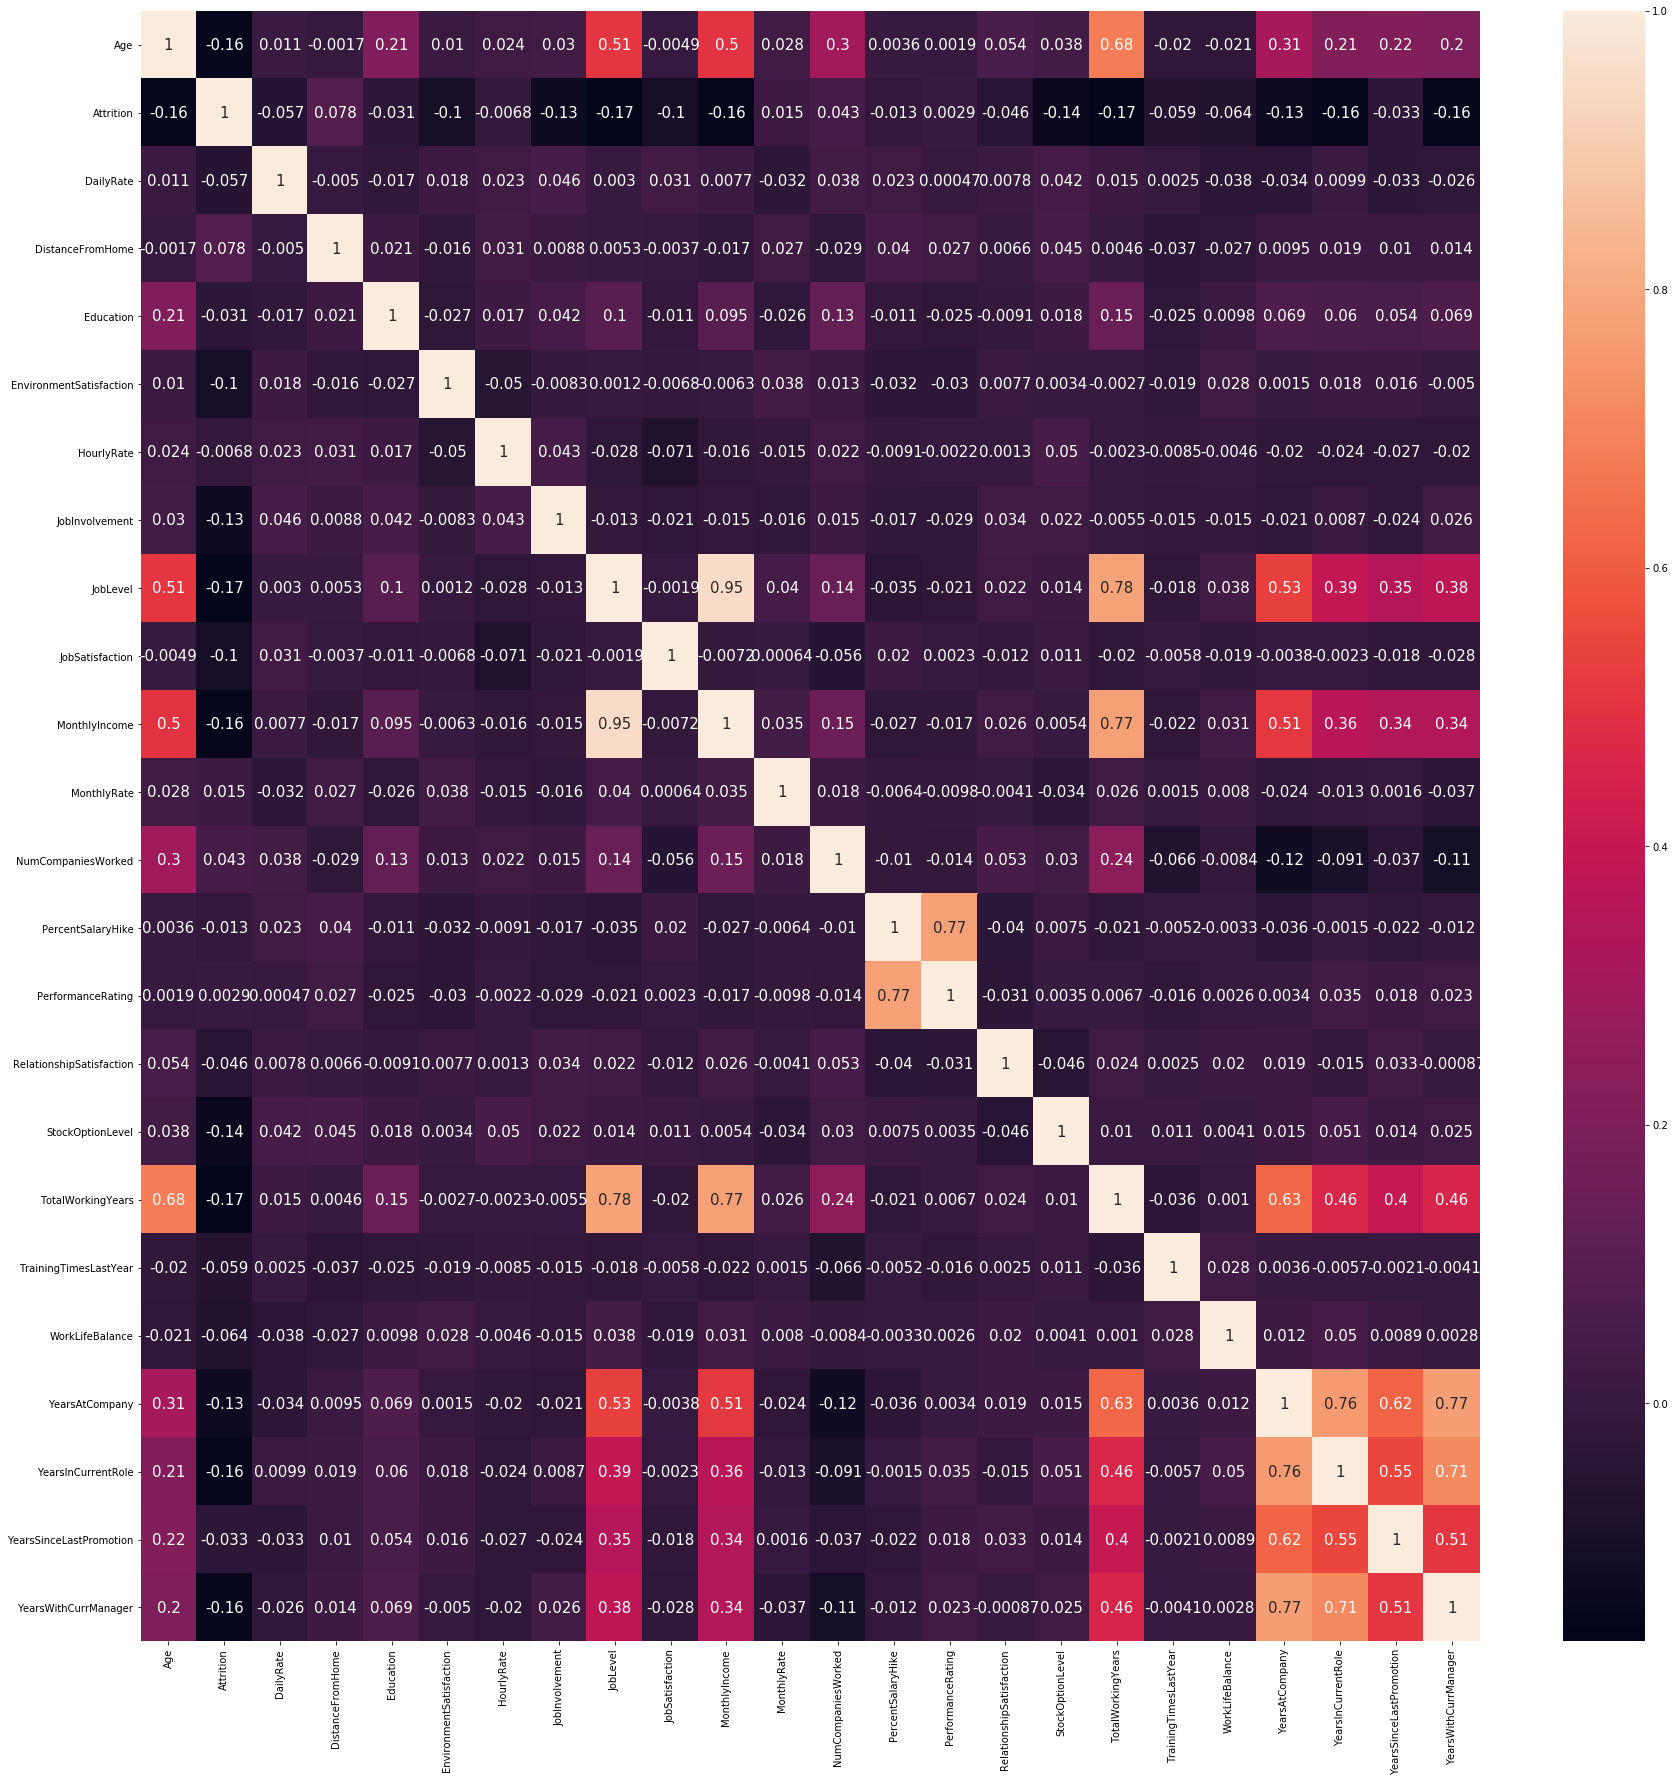

In [65]:
fig,ax=plt.subplots(figsize=(30, 30))
sns.heatmap(attr.corr(), annot=True, annot_kws={"size":15})
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

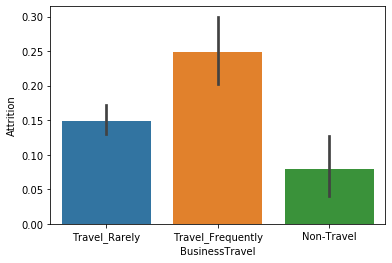

In [66]:
sns.barplot(attr['BusinessTravel'],attr['Attrition'])
plt.show()

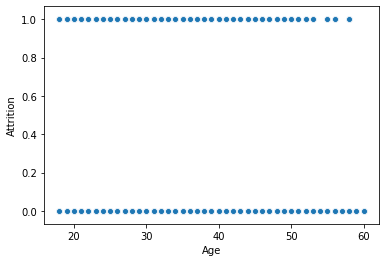

In [67]:
sns.scatterplot(attr['Age'],attr['Attrition'])
plt.show()

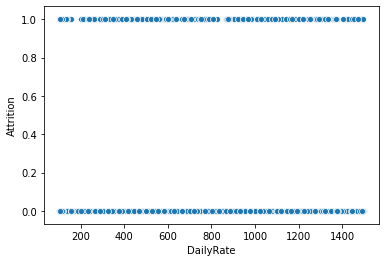

In [68]:
sns.scatterplot(attr['DailyRate'],attr['Attrition'])
plt.show()

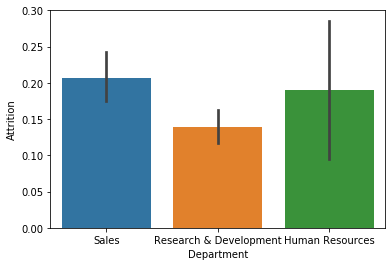

In [69]:
sns.barplot(attr['Department'],attr['Attrition'])
plt.show()

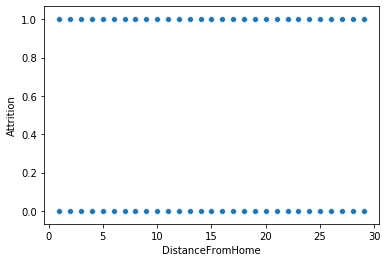

In [70]:
sns.scatterplot(attr['DistanceFromHome'],attr['Attrition'])
plt.show()

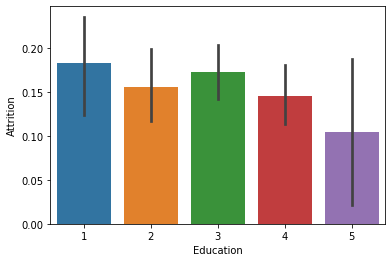

In [71]:
sns.barplot(attr['Education'],attr['Attrition'])
plt.show()

Here 1,2,3,4,5 stands for BelowCollege,College,Bachelor,Master,Doctor respectively.

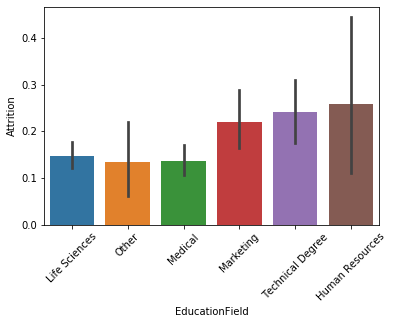

In [72]:
chart=sns.barplot(attr['EducationField'],attr['Attrition'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

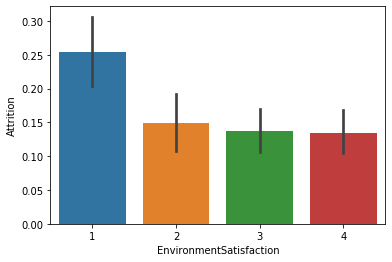

In [73]:
sns.barplot(attr['EnvironmentSatisfaction'],attr['Attrition'])
plt.show()

Here 1 stands for Low, 2 for Medium, 3 for High, 4 for Very High

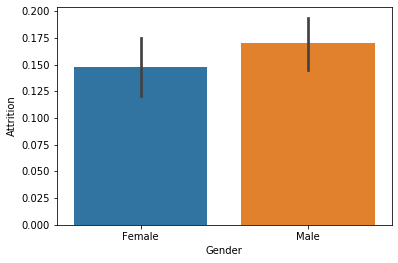

In [74]:
sns.barplot(attr['Gender'],attr['Attrition'])
plt.show()

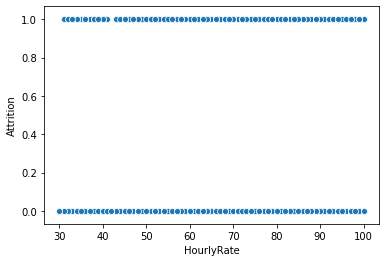

In [75]:
sns.scatterplot(attr['HourlyRate'],attr['Attrition'])
plt.show()

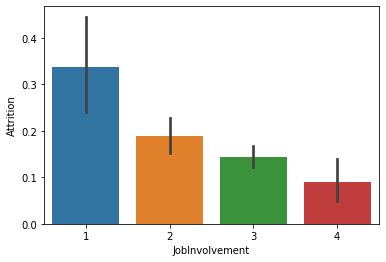

In [76]:
sns.barplot(attr['JobInvolvement'],attr['Attrition'])
plt.show()

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

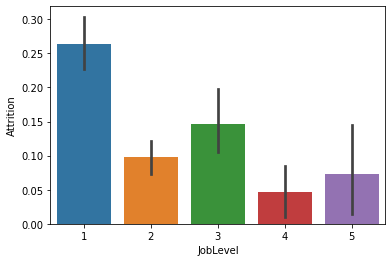

In [77]:
sns.barplot(attr['JobLevel'],attr['Attrition'])
plt.show()

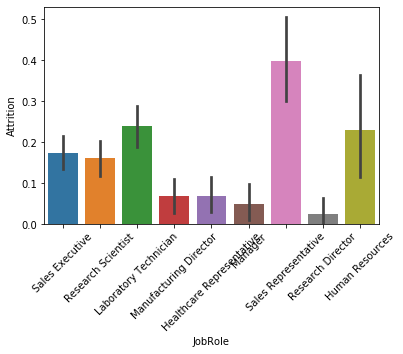

In [78]:
chart=sns.barplot(attr['JobRole'],attr['Attrition'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

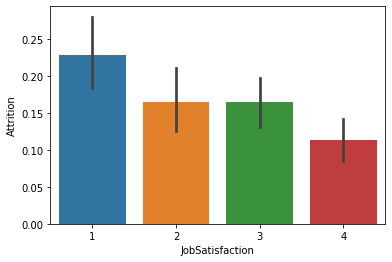

In [79]:
sns.barplot(attr['JobSatisfaction'],attr['Attrition'])
plt.show()

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

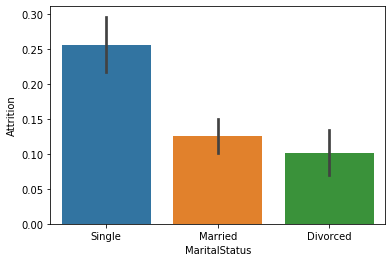

In [80]:
sns.barplot(attr['MaritalStatus'],attr['Attrition'])
plt.show()

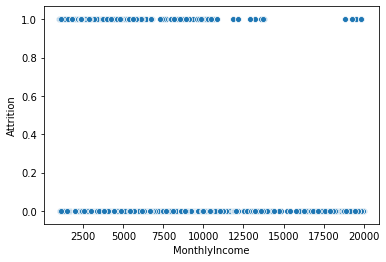

In [81]:
sns.scatterplot(attr['MonthlyIncome'],attr['Attrition'])
plt.show()

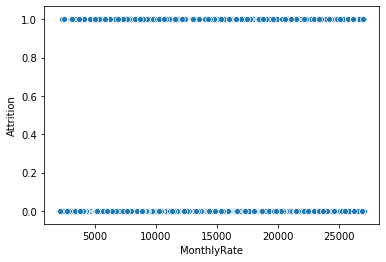

In [82]:
sns.scatterplot(attr['MonthlyRate'],attr['Attrition'])
plt.show()

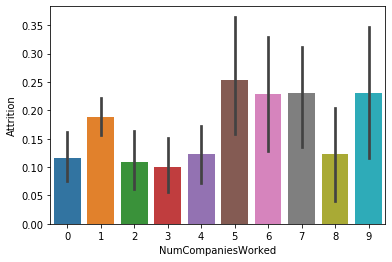

In [83]:
sns.barplot(attr['NumCompaniesWorked'],attr['Attrition'])
plt.show()

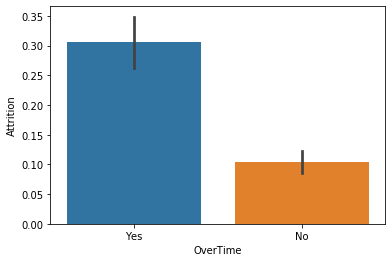

In [84]:
sns.barplot(attr['OverTime'],attr['Attrition'])
plt.show()

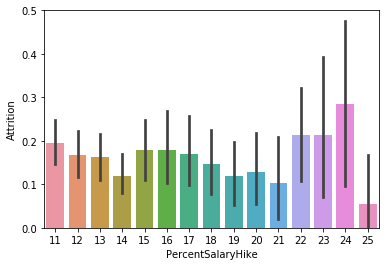

In [85]:
sns.barplot(attr['PercentSalaryHike'],attr['Attrition'])
plt.show()

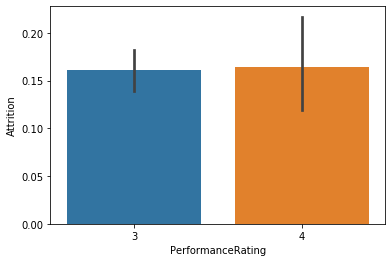

In [86]:
sns.barplot(attr['PerformanceRating'],attr['Attrition'])
plt.show()

PerformanceRating
3 'Excellent'
4 'Outstanding'

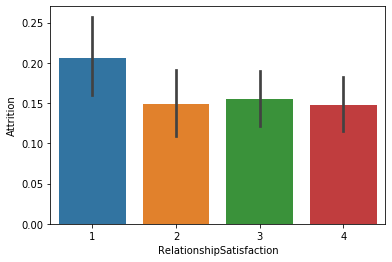

In [87]:
sns.barplot(attr['RelationshipSatisfaction'],attr['Attrition'])
plt.show()

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

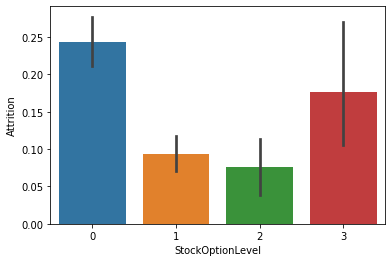

In [88]:
sns.barplot(attr['StockOptionLevel'],attr['Attrition'])
plt.show()

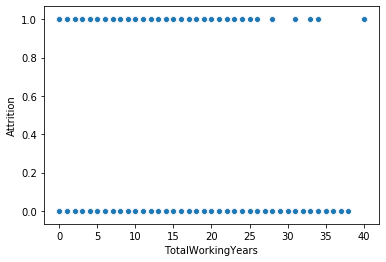

In [89]:
sns.scatterplot(attr['TotalWorkingYears'],attr['Attrition'])
plt.show()

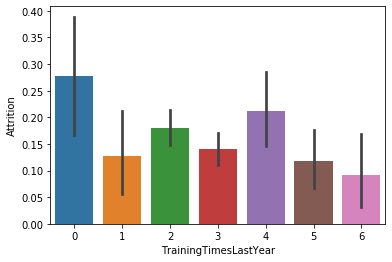

In [90]:
sns.barplot(attr['TrainingTimesLastYear'],attr['Attrition'])
plt.show()

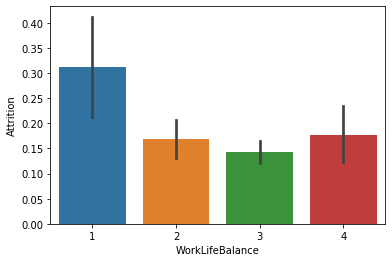

In [91]:
sns.barplot(attr['WorkLifeBalance'],attr['Attrition'])
plt.show()

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

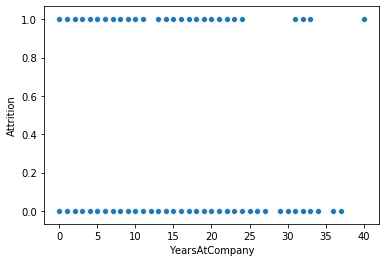

In [92]:
sns.scatterplot(attr['YearsAtCompany'],attr['Attrition'])
plt.show()

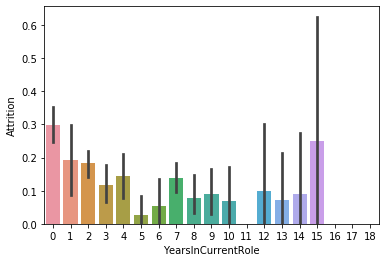

In [93]:
sns.barplot(attr['YearsInCurrentRole'],attr['Attrition'])
plt.show()

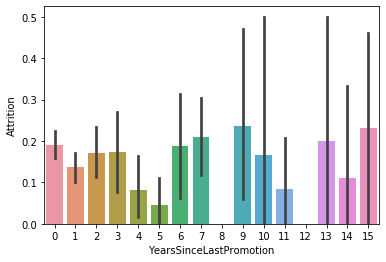

In [94]:
sns.barplot(attr['YearsSinceLastPromotion'],attr['Attrition'])
plt.show()

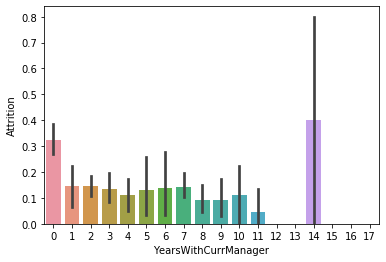

In [95]:
sns.barplot(attr['YearsWithCurrManager'],attr['Attrition'])
plt.show()

# Performing Statistical Test To check the Feature Importance

In [96]:
#We will carry out Chi-Square (Test Of Independence) here between the two categorical features
#H0: The two features are independent of each other
#H1: The two features are dependent on each other
cat_col=[]
for i in attr.columns:
    if ((attr[i].nunique())<=10):
        cat_col.append(i)
cat_col.remove('Attrition')
for i in cat_col:
    Test=pd.crosstab(attr['Attrition'],attr[i])
    chi2,p,dof,expected=chi2_contingency(Test)
    if(p<0.05):
        print(f"{i}: Significant Feature with P-value:- ",p)
    else:
        print(f"{i}: Not Significant Feature with P-value:-  ",p)

BusinessTravel: Significant Feature with P-value:-  5.608614476449931e-06
Department: Significant Feature with P-value:-  0.004525606574479633
Education: Not Significant Feature with P-value:-   0.5455253376565949
EducationField: Significant Feature with P-value:-  0.006773980139025222
EnvironmentSatisfaction: Significant Feature with P-value:-  5.1234689062894205e-05
Gender: Not Significant Feature with P-value:-   0.29057244902890855
JobInvolvement: Significant Feature with P-value:-  2.8631806367134195e-06
JobLevel: Significant Feature with P-value:-  6.634684715458909e-15
JobRole: Significant Feature with P-value:-  2.752481638050657e-15
JobSatisfaction: Significant Feature with P-value:-  0.0005563004510387556
MaritalStatus: Significant Feature with P-value:-  9.45551106034083e-11
NumCompaniesWorked: Significant Feature with P-value:-  0.002249178294685049
OverTime: Significant Feature with P-value:-  8.15842372153832e-21
PerformanceRating: Not Significant Feature with P-value:-  

In [97]:
numeric_cols=[]
for j in attr.columns:
    if ((attr[j].nunique())>10):
        numeric_cols.append(j)
for j in numeric_cols:
    tstat,p_value=ttest_ind(attr[attr['Attrition']==1][j],attr[attr['Attrition']==0][j])
    if(p_value<0.05):
        print(f"{j}: Significant Feature with P-value:- ",p_value)
    else:
        print(f"{j}: Not Significant Feature with P-value:- ",p_value)

Age: Significant Feature with P-value:-  8.356308021103649e-10
DailyRate: Significant Feature with P-value:-  0.02985816066026497
DistanceFromHome: Significant Feature with P-value:-  0.0027930600802134266
HourlyRate: Not Significant Feature with P-value:-  0.7931347689944243
MonthlyIncome: Significant Feature with P-value:-  7.14736398535381e-10
MonthlyRate: Not Significant Feature with P-value:-  0.5611235982243015
PercentSalaryHike: Not Significant Feature with P-value:-  0.6056128238893757
TotalWorkingYears: Significant Feature with P-value:-  4.0618781112668525e-11
YearsAtCompany: Significant Feature with P-value:-  2.3188716103863033e-07
YearsInCurrentRole: Significant Feature with P-value:-  6.003185843641377e-10
YearsSinceLastPromotion: Not Significant Feature with P-value:-  0.2057899591624936
YearsWithCurrManager: Significant Feature with P-value:-  1.7369867845242207e-09


From the above tests performed we can come to an conclusion that the features that we selected from Exploratory Data Analysis
are Significant becuase when we performed Statistical Tests the same columns turned out to be Significant.
Next we will drop the Non-Significant features.

In [98]:
attr_new=attr.drop(columns=['Education','Gender','PerformanceRating','RelationshipSatisfaction','HourlyRate','MonthlyRate',
                           'PercentSalaryHike','YearsSinceLastPromotion'])

In [99]:
attr_new.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Froma above we can see that our target column is highly imbalanced.
So before making the target balanced we will make a base model with imbalanced class and we will try to 
improve our score further.

In [100]:
attr_new.head()
pd.set_option('max_columns',None)
attr_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Life Sciences,2,3,2,Sales Executive,4,Single,5993,8,Yes,0,8,0,1,6,4,5
1,49,0,Travel_Frequently,279,Research & Development,8,Life Sciences,3,2,2,Research Scientist,2,Married,5130,1,No,1,10,3,3,10,7,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Other,4,2,1,Laboratory Technician,3,Single,2090,6,Yes,0,7,3,3,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,3,1,Research Scientist,3,Married,2909,1,Yes,0,8,3,3,8,7,0
4,27,0,Travel_Rarely,591,Research & Development,2,Medical,1,3,1,Laboratory Technician,2,Married,3468,9,No,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,Medical,3,4,2,Laboratory Technician,4,Married,2571,4,No,1,17,3,3,5,2,3
1466,39,0,Travel_Rarely,613,Research & Development,6,Medical,4,2,3,Healthcare Representative,1,Married,9991,4,No,1,9,5,3,7,7,7
1467,27,0,Travel_Rarely,155,Research & Development,4,Life Sciences,2,4,2,Manufacturing Director,2,Married,6142,1,Yes,1,6,0,3,6,2,3
1468,49,0,Travel_Frequently,1023,Sales,2,Medical,4,2,2,Sales Executive,2,Married,5390,2,No,0,17,3,2,9,6,8


In [101]:
attr_new_dummies=pd.get_dummies(attr_new,columns=['BusinessTravel','Department','EducationField','EnvironmentSatisfaction',
                                 'JobSatisfaction','JobLevel','JobInvolvement','OverTime','JobRole',
                                'WorkLifeBalance','MaritalStatus'],drop_first=True)

# Base Model with Imbalanced Class

In [102]:
X=attr_new_dummies.drop('Attrition',axis=1)
y=attr_new_dummies['Attrition']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,stratify=y,random_state = 42)
attr_new_dummies['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [103]:
def base_model(model1):
    if model1=='knn1' or model1=='lr1':
        std_scale = StandardScaler()
        X_train_scaled = std_scale.fit_transform(Xtrain)
        X_test_scaled = std_scale.transform(Xtest)
        model1.fit(X_train_scaled,ytrain)
        y_predict    = model1.predict(X_test_scaled)
        accuracy_imb = model1.score(X_test_std, ytest).round(2)
        precision_imb= precision_score(ytest, y_predict).round(2) 
        recall_imb   = recall_score(ytest, y_predict).round(2) 
        f1_imb       = f1_score(ytest, y_predict).round(2)
    else:
        model1.fit(Xtrain,ytrain)
        y_predict    = model1.predict(Xtest)
        accuracy_imb = model1.score(Xtest, ytest).round(2)
        precision_imb= precision_score(ytest, y_predict).round(2) 
        recall_imb   = recall_score(ytest, y_predict).round(2) 
        f1_imb       = f1_score(ytest, y_predict).round(2)
            
    return(accuracy_imb,precision_imb,recall_imb,f1_imb)   

In [104]:
lr1=LogisticRegression(random_state=42,n_jobs=-1)
rf=RandomForestClassifier(random_state=42)
dt=DecisionTreeClassifier(random_state=42)
knn1=KNeighborsClassifier(n_jobs=-1)
nb=GaussianNB()

In [105]:
models=[]
models.append(('Logistic Regression',lr1))
models.append(('Decision Tree',dt))
models.append(('Random Forest',rf))
models.append(('KNN',knn1))
models.append(('Naive Bayes',nb))

In [106]:
accuracy_score=[]
precision_value=[]
recall_value=[]
f1_value=[]
name_list=[]
for name,model1 in models:
    accuracy_imb,precision_imb,recall_imb,f1_imb=base_model(model1)
    accuracy_score.append(accuracy_imb)
    precision_value.append(precision_imb)
    recall_value.append(recall_imb)
    f1_value.append(f1_imb)
    name_list.append(name)
score=pd.DataFrame({'Model_name':name_list,'Accuracy':accuracy_score,'Precision':precision_value,
                    'Recall':recall_value,'F1_Score':f1_value})
score

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.82,0.27,0.06,0.10
1,Decision Tree,0.78,0.33,0.34,0.33
2,Random Forest,0.84,0.45,0.11,0.17
3,KNN,0.82,0.27,0.09,0.13
4,Naive Bayes,0.68,0.29,0.70,0.42


Here we see that as our data is imbalanced the f1_score is very low. So we will do oversampling here by using 
resampling technique and then build our further models.

# Data Modelling with Balanced Data

In [107]:
X1 = attr_new_dummies.drop('Attrition', axis=1)
y1 = attr_new_dummies.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concatinating X_train and y_train
df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
minority_class = df[df.Attrition == 1]
#print(minority_class)
majority_class = df[df.Attrition == 0]
#print(majority_class)
minority_upsample=resample(minority_class,n_samples=majority_class.shape[0],
                           random_state=42)
df_2 = pd.concat([minority_upsample, majority_class])
X_train = df_2.drop('Attrition', axis=1)
y_train = df_2.Attrition

In [108]:
def model_evaluation(model):
    if model=='knn' or model=='lr':
        scaler = StandardScaler()
        X_train_std = scaler.fit_transform(X_train)
        X_test_std = scaler.transform(X_test)
        model.fit(X_train_std,y_train)
        y_pred   = model.predict(X_test_std)
        accuracy = model.score(X_test_std, y_test).round(2)
        precision= precision_score(y_test, y_pred).round(2) 
        recall   = recall_score(y_test, y_pred).round(2) 
        f1       = f1_score(y_test, y_pred).round(2)
         
    else:
        model.fit(X_train,y_train)
        y_pred   = model.predict(X_test)
        accuracy = model.score(X_test, y_test).round(2)
        precision= precision_score(y_test, y_pred).round(2) 
        recall   = recall_score(y_test, y_pred).round(2) 
        f1       = f1_score(y_test, y_pred).round(2)
         
    return(accuracy,precision,recall,f1)
         

In [109]:
lr=LogisticRegression(random_state=42,n_jobs=-1)
rf=RandomForestClassifier(random_state=42)
dt=DecisionTreeClassifier(random_state=42)
knn=KNeighborsClassifier(n_jobs=-1)
nb=GaussianNB()

In [110]:
models=[]
models.append(('Logistic Regression',lr))
models.append(('Decision Tree',dt))
models.append(('Random Forest',rf))
models.append(('KNN',knn))
models.append(('Naive Bayes',nb))

In [111]:
accuracy_score=[]
precision_value=[]
recall_value=[]
f1_value=[]
name_list=[]
for name,model in models:
    accuracy,precision,recall,f1=model_evaluation(model)
    accuracy_score.append(accuracy)
    precision_value.append(precision)
    recall_value.append(recall)
    f1_value.append(f1)
    name_list.append(name)
score=pd.DataFrame({'Model_name':name_list,'Accuracy':accuracy_score,'Precision':precision_value,
                    'Recall':recall_value,'F1_Score':f1_value})
score

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.66,0.21,0.56,0.30
1,Decision Tree,0.78,0.20,0.23,0.21
2,Random Forest,0.87,0.50,0.15,0.24
3,KNN,0.62,0.16,0.44,0.23
4,Naive Bayes,0.59,0.20,0.72,0.32


# Tuning Decision Tree

In [112]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
for i in ['gini','entropy']:                 #criterion
    for j in np.arange(1,20):                #max_depth
        for k in np.arange(1,20):        #min_samples_leaf
                dt1=DecisionTreeClassifier(criterion=i,max_depth=j,min_samples_leaf=k,random_state=42)
                accuracy,precision,recall,f1=model_evaluation(dt1)
                test_accuracy.append(np.mean(accuracy))
                test_precision.append(np.mean(precision))
                test_recall.append(np.mean(recall))
                test_f1.append(np.mean(f1))
                param.append((i,j,k))

In [113]:
result=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)

In [114]:
result[result.Recall==result.Recall.max()]

,Accuracy,Precision,Recall,f1
"(gini, 4, 1)",0.75,0.27,0.51,0.35
"(gini, 4, 2)",0.75,0.27,0.51,0.35
"(gini, 4, 3)",0.75,0.27,0.51,0.35
"(gini, 4, 4)",0.74,0.26,0.51,0.35
"(gini, 4, 5)",0.74,0.26,0.51,0.35
...,...,...,...,...
"(entropy, 18, 17)",0.71,0.23,0.51,0.32
"(entropy, 18, 19)",0.76,0.27,0.51,0.36
"(entropy, 19, 16)",0.72,0.24,0.51,0.33
"(entropy, 19, 17)",0.71,0.23,0.51,0.32


In [115]:
result[result.f1==result.f1.max()]

,Accuracy,Precision,Recall,f1
"(gini, 5, 19)",0.81,0.33,0.41,0.37
"(entropy, 8, 19)",0.78,0.30,0.49,0.37


In [116]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=19,random_state=42)
model_evaluation(dt1)

(0.78, 0.3, 0.49, 0.37)

# Tuning Random Forest

In [144]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
for k in np.arange(1,100):
    for a in np.arange(1,10):
        for b in np.arange(1,10):
            rf=RandomForestClassifier(n_estimators=k,max_depth=a,min_samples_leaf=b,random_state=42,n_jobs=-1)
            accuracy,precision,recall,f1=model_evaluation(rf)
            test_accuracy.append(np.mean(accuracy))
            test_precision.append(np.mean(precision))
            test_recall.append(np.mean(recall))
            test_f1.append(np.mean(f1))
            param.append((k,a,b))
                

In [145]:
result2=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result2[result2.f1==result2.f1.max()]

,Accuracy,Precision,Recall,f1
"(8, 9, 1)",0.84,0.41,0.44,0.43


In [146]:
result2[result2.Recall==result2.Recall.max()]


,Accuracy,Precision,Recall,f1
"(7, 3, 1)",0.7,0.26,0.67,0.37
"(7, 3, 2)",0.7,0.26,0.67,0.37
"(7, 3, 3)",0.7,0.26,0.67,0.37
"(7, 3, 4)",0.7,0.26,0.67,0.37
"(7, 3, 5)",0.7,0.26,0.67,0.37
"(7, 3, 6)",0.7,0.26,0.67,0.37
"(7, 3, 7)",0.7,0.26,0.67,0.37
"(7, 3, 8)",0.7,0.26,0.67,0.37
"(7, 3, 9)",0.7,0.26,0.67,0.37


In [172]:
rf2=RandomForestClassifier(n_estimators=8,max_depth=9,min_samples_leaf=1,random_state=42,n_jobs=-1)
model_evaluation(rf2)

(0.84, 0.41, 0.44, 0.43)

# Tuning KNN

In [150]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
for k in np.arange (1,50):
     for a in ['uniform','distance']:
            knn=KNeighborsClassifier(n_neighbors=k,weights=a,n_jobs=-1)
            accuracy,precision,recall,f1=model_evaluation(knn)
            test_accuracy.append(np.mean(accuracy))
            test_precision.append(np.mean(precision))
            test_recall.append(np.mean(recall))
            test_f1.append(np.mean(f1))
            param.append((k,a))

In [151]:
result3=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result3[result3.f1==result3.f1.max()]

,Accuracy,Precision,Recall,f1
"(7, uniform)",0.64,0.2,0.56,0.29


In [152]:
result3[result3.Recall==result3.Recall.max()]


,Accuracy,Precision,Recall,f1
"(7, uniform)",0.64,0.2,0.56,0.29


In [80]:
knn=KNeighborsClassifier(n_neighbors=7,weights='uniform',n_jobs=-1)
model_evaluation(knn)

(0.6, 0.22, 0.56, 0.31)

In [117]:
lr2=LogisticRegression(random_state=42,n_jobs=-1)
dt=DecisionTreeClassifier(random_state=42)
tuned_dt=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=19,random_state=42)
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
tuned_rf=RandomForestClassifier(n_estimators=8,max_depth=9,min_samples_leaf=1,random_state=42,n_jobs=-1)
knn2=KNeighborsClassifier(n_jobs=-1)
tunned_knn=KNeighborsClassifier(n_neighbors=7,weights='uniform',n_jobs=-1)
nb=GaussianNB()

In [118]:
models=[]
models.append(('Logistic Regression',lr2))
models.append(('Decision Tree',dt))
models.append(('Tunned DT',tuned_dt))
models.append(('Random Forest',rf))
models.append(('Tunned RF',tuned_rf))
models.append(('KNN',knn2))
models.append(('Tunned KNN',tunned_knn))
models.append(('Naive Bayes',nb))

In [119]:
accuracy_score=[]
precision_value=[]
recall_value=[]
f1_value=[]
name_list=[]
for name,model2 in models:
    accuracy,precision,recall,f1=model_evaluation(model2)
    accuracy_score.append(accuracy)
    precision_value.append(precision)
    recall_value.append(recall)
    f1_value.append(f1)
    name_list.append(name)
score=pd.DataFrame({'Model_name':name_list,'Accuracy':accuracy_score,'Precision':precision_value,
                    'Recall':recall_value,'F1_Score':f1_value})
score

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.66,0.21,0.56,0.30
1,Decision Tree,0.78,0.20,0.23,0.21
2,Tunned DT,0.78,0.30,0.49,0.37
3,Random Forest,0.87,0.50,0.15,0.24
4,Tunned RF,0.84,0.41,0.44,0.43
5,KNN,0.62,0.16,0.44,0.23
6,Tunned KNN,0.64,0.20,0.56,0.29
7,Naive Bayes,0.59,0.20,0.72,0.32


# Bagging

### Bagged LR

In [153]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
lr2=LogisticRegression(random_state=42,n_jobs=-1)
for k in np.arange (1,100):
    bagged_lr=BaggingClassifier(base_estimator=lr2,n_estimators=k,n_jobs=-1,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(bagged_lr)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [154]:
result4=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result4[result4.f1==result4.f1.max()]

,Accuracy,Precision,Recall,f1
33,0.66,0.21,0.59,0.32
38,0.66,0.21,0.59,0.32
39,0.66,0.21,0.59,0.32
40,0.66,0.21,0.59,0.32
41,0.66,0.22,0.59,0.32
42,0.67,0.22,0.59,0.32
43,0.67,0.22,0.59,0.32
44,0.67,0.22,0.59,0.32
45,0.67,0.22,0.59,0.32
46,0.67,0.22,0.59,0.32


In [155]:
result4[result4.Recall==result4.Recall.max()]

,Accuracy,Precision,Recall,f1
1,0.65,0.21,0.59,0.31
19,0.65,0.21,0.59,0.31
20,0.65,0.21,0.59,0.31
21,0.65,0.21,0.59,0.31
22,0.65,0.21,0.59,0.31
23,0.65,0.21,0.59,0.31
24,0.65,0.21,0.59,0.31
25,0.65,0.21,0.59,0.31
26,0.65,0.21,0.59,0.31
27,0.65,0.21,0.59,0.31


### Bagged DT

In [157]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
tuned_dt=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=19,random_state=42)
for k in np.arange (1,100):
    bagged_dt=BaggingClassifier(base_estimator=tuned_dt,n_estimators=k,n_jobs=-1,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(bagged_dt)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [158]:
result5=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result5[result5.f1==result5.f1.max()]

,Accuracy,Precision,Recall,f1
9,0.8,0.33,0.46,0.38


In [159]:
result5[result5.Recall==result5.Recall.max()]

,Accuracy,Precision,Recall,f1
1,0.73,0.26,0.56,0.36
2,0.72,0.25,0.56,0.35


### Bagged NB

In [160]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
nb=GaussianNB()
for k in np.arange (1,100):
    bagged_nb=BaggingClassifier(base_estimator=nb,n_estimators=k,n_jobs=-1,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(bagged_nb)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [161]:
result6=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result6[result6.f1==result6.f1.max()]

,Accuracy,Precision,Recall,f1
1,0.63,0.21,0.67,0.32
2,0.60,0.21,0.72,0.32
4,0.59,0.20,0.72,0.32
5,0.59,0.20,0.72,0.32
6,0.59,0.20,0.72,0.32
7,0.59,0.20,0.72,0.32
8,0.60,0.21,0.72,0.32
10,0.59,0.20,0.72,0.32
11,0.59,0.20,0.72,0.32
12,0.59,0.20,0.72,0.32


In [162]:
result6[result6.Recall==result6.Recall.max()]

,Accuracy,Precision,Recall,f1
2,0.60,0.21,0.72,0.32
3,0.58,0.20,0.72,0.31
4,0.59,0.20,0.72,0.32
5,0.59,0.20,0.72,0.32
6,0.59,0.20,0.72,0.32
7,0.59,0.20,0.72,0.32
8,0.60,0.21,0.72,0.32
9,0.59,0.20,0.72,0.31
10,0.59,0.20,0.72,0.32
11,0.59,0.20,0.72,0.32


# Boosting

## Boosted LR

In [163]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
lr2=LogisticRegression(random_state=42,n_jobs=-1)
for k in np.arange (101,201):
    boosted_lr=AdaBoostClassifier(base_estimator=lr2,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(boosted_lr)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [164]:
result7=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result7[result7.f1==result7.f1.max()]

,Accuracy,Precision,Recall,f1
135,0.73,0.26,0.59,0.37
136,0.73,0.26,0.59,0.37
137,0.73,0.26,0.59,0.37
138,0.73,0.26,0.59,0.37
139,0.73,0.26,0.59,0.37
140,0.73,0.26,0.59,0.37
141,0.73,0.26,0.59,0.37
142,0.73,0.26,0.59,0.37
143,0.73,0.26,0.59,0.37
144,0.73,0.26,0.59,0.37


In [165]:
result7[result7.Recall==result7.Recall.max()]

,Accuracy,Precision,Recall,f1
101,0.72,0.26,0.59,0.36
102,0.72,0.26,0.59,0.36
103,0.72,0.26,0.59,0.36
104,0.72,0.26,0.59,0.36
105,0.72,0.26,0.59,0.36
106,0.72,0.26,0.59,0.36
107,0.72,0.26,0.59,0.36
108,0.72,0.26,0.59,0.36
109,0.72,0.26,0.59,0.36
110,0.72,0.26,0.59,0.36


## Boosted DT

In [166]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
tuned_dt=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=19,random_state=42)
for k in np.arange (1,150):
    boosted_dt=AdaBoostClassifier(base_estimator=tuned_dt,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(boosted_dt)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [167]:
result8=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result8[result8.f1==result8.f1.max()]

,Accuracy,Precision,Recall,f1
52,0.88,0.60,0.31,0.41
57,0.88,0.60,0.31,0.41
59,0.88,0.63,0.31,0.41
60,0.88,0.60,0.31,0.41
61,0.88,0.60,0.31,0.41


In [168]:
result8[result8.Recall==result8.Recall.max()]

,Accuracy,Precision,Recall,f1
1,0.79,0.3,0.46,0.36


## Boosted NB

In [169]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
nb=GaussianNB()
for k in np.arange (1,100):
    boosted_nb=AdaBoostClassifier(base_estimator=nb,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(boosted_nb)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [170]:
result9=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result8[result8.f1==result8.f1.max()]

,Accuracy,Precision,Recall,f1
52,0.88,0.60,0.31,0.41
57,0.88,0.60,0.31,0.41
59,0.88,0.63,0.31,0.41
60,0.88,0.60,0.31,0.41
61,0.88,0.60,0.31,0.41


In [171]:
result8[result8.Recall==result8.Recall.max()]

,Accuracy,Precision,Recall,f1
1,0.79,0.3,0.46,0.36


## Boosted RF

In [173]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
rf=RandomForestClassifier(n_estimators=8,max_depth=9,min_samples_leaf=1,random_state=42,n_jobs=-1)
for k in np.arange (1,100):
    boosted_rf=AdaBoostClassifier(base_estimator=rf,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(boosted_rf)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [174]:
result10=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result10[result10.f1==result10.f1.max()]

,Accuracy,Precision,Recall,f1
3,0.87,0.55,0.31,0.39


In [175]:
result10[result10.Recall==result10.Recall.max()]

,Accuracy,Precision,Recall,f1
3,0.87,0.55,0.31,0.39


# Cost Sensitive Approach

# Tunning Cost Sensitve Decision Tree

In [104]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
for a in [{0:17,1:83}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},{0:1,1:1},{0:91,1:411}]:
    for i in ['gini','entropy']:                 #criterion
        for j in np.arange(1,20):                #max_depth
            for k in np.arange(1,20):        #min_samples_leaf
                    dt1=DecisionTreeClassifier(criterion=i,max_depth=j,min_samples_leaf=k,random_state=42,class_weight=a)
                    accuracy,precision,recall,f1=base_model(dt1)
                    test_accuracy.append(np.mean(accuracy))
                    test_precision.append(np.mean(precision))
                    test_recall.append(np.mean(recall))
                    test_f1.append(np.mean(f1))
                    param.append((a,i,j,k))

result=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)


result[result.f1==result.f1.max()]

,Accuracy,Precision,Recall,f1
"({0: 10, 1: 1}, entropy, 18, 1)",0.82,0.45,0.49,0.47
"({0: 91, 1: 411}, gini, 6, 4)",0.78,0.38,0.62,0.47


# Bagged Cost Sensitive DT

In [120]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
weights={0:91,1:411}
tuned_dt=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=4,random_state=42,class_weight=weights)
for k in np.arange (1,100):
    bagged_dt=BaggingClassifier(base_estimator=tuned_dt,n_estimators=k,n_jobs=-1,random_state=42)
    accuracy,precision,recall,f1=base_model(bagged_dt)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [121]:
result1=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)

In [122]:
result1[result1.f1==result1.f1.max()]

,Accuracy,Precision,Recall,f1
34,0.83,0.48,0.4,0.44
36,0.83,0.48,0.4,0.44
37,0.83,0.48,0.4,0.44


# Boosted Cost Sensitive Decision Tree

In [123]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
weights={0:91,1:411}
tuned_dt=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=4,random_state=42,class_weight=weights)
for k in np.arange (1,100):
    boosted_dt=AdaBoostClassifier(base_estimator=tuned_dt,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=base_model(boosted_dt)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [124]:
result3=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)

In [125]:
result3[result3.f1==result3.f1.max()]

,Accuracy,Precision,Recall,f1
1,0.77,0.36,0.57,0.45


# Tunning Cost Sensitive RF

In [127]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
for i in [{0:17,1:83}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},{0:1,1:1},{0:91,1:411}]:
    for k in np.arange(1,100):
        for a in np.arange(1,10):
            for b in np.arange(1,10):
                rf=RandomForestClassifier(n_estimators=k,max_depth=a,min_samples_leaf=b,random_state=42,n_jobs=-1,class_weight=i)
                accuracy,precision,recall,f1=base_model(rf)
                test_accuracy.append(np.mean(accuracy))
                test_precision.append(np.mean(precision))
                test_recall.append(np.mean(recall))
                test_f1.append(np.mean(f1))
                param.append((i,k,a,b))
                

result2=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result2

result2[result2.f1==result2.f1.max()]

,Accuracy,Precision,Recall,f1
"({0: 1, 1: 10}, 84, 7, 8)",0.78,0.4,0.79,0.53
"({0: 1, 1: 10}, 86, 7, 8)",0.78,0.4,0.79,0.53


In [128]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
weights={0:1,1:10}
rf=RandomForestClassifier(n_estimators=84,max_depth=7,min_samples_leaf=8,random_state=42,n_jobs=-1)
for k in np.arange (1,100):
    boosted_rf=AdaBoostClassifier(base_estimator=rf,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=base_model(boosted_rf)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))
   

In [129]:
result3=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result3

result3[result3.f1==result3.f1.max()]

,Accuracy,Precision,Recall,f1
21,0.85,0.62,0.21,0.32


In [131]:
weights={0:1,1:10}
lr=LogisticRegression(class_weight=weights,random_state=42,n_jobs=-1)
base_model(lr)

(0.48, 0.21, 0.81, 0.33)

# Cost Sensitive Bagged LR

In [ ]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
weights={0:1,1:10}
lr2=LogisticRegression(random_state=42,n_jobs=-1,class_weight=weights)
for k in np.arange (1,100):
    bagged_lr=BaggingClassifier(base_estimator=lr2,n_estimators=k,n_jobs=-1,random_state=42)
    accuracy,precision,recall,f1=base_model(bagged_lr)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [132]:
result4=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result4

result4[result4.f1==result4.f1.max()]

,Accuracy,Precision,Recall,f1
21,0.85,0.62,0.21,0.32


In [134]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
weights={0:1,1:10}
lr2=LogisticRegression(random_state=42,n_jobs=-1)
for k in np.arange (1,100):
    boosted_lr=AdaBoostClassifier(base_estimator=lr2,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=base_model(boosted_lr)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [135]:
result5=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result5

result5[result5.f1==result5.f1.max()]

,Accuracy,Precision,Recall,f1
7,0.85,0.8,0.09,0.15
8,0.85,0.8,0.09,0.15
9,0.85,0.8,0.09,0.15
10,0.85,0.8,0.09,0.15
11,0.85,0.8,0.09,0.15
12,0.85,0.8,0.09,0.15
13,0.85,0.8,0.09,0.15
14,0.85,0.8,0.09,0.15
15,0.85,0.8,0.09,0.15
16,0.85,0.8,0.09,0.15
